In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

In [29]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [30]:
def U2():
    """Controlled multiplication by 9 mod 10"""
    U = QuantumCircuit(4)   
    U.x(3)
    U = U.to_gate()
    U.name = "U2" 
    c_U = U.control()
    return c_U

In [31]:
def U1():
    """Controlled multiplication by 9 mod 10"""
    U = QuantumCircuit(4)   
    U.x(1)
    U.swap(3,2)
    U = U.to_gate()
    U.name = "U1" 
    c_U = U.control()
    return c_U

Could not find period, check a < N and have no common factors.


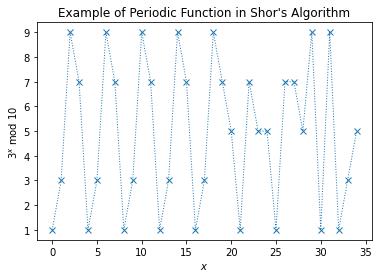

In [67]:
N = 10
a = 3

# Calculate the plotting data
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel='$%i^x$ mod $%i$' % (a, N),
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) +1 
    plt.annotate(text='', xy=(0,1), xytext=(r,1), arrowprops=dict(arrowstyle='<->'))
    plt.annotate(text='$r=%i$' % r, xy=(r/3,1.5))
except:
    print('Could not find period, check a < N and have no common factors.')

In [76]:
np.mod(3**28,10)

1

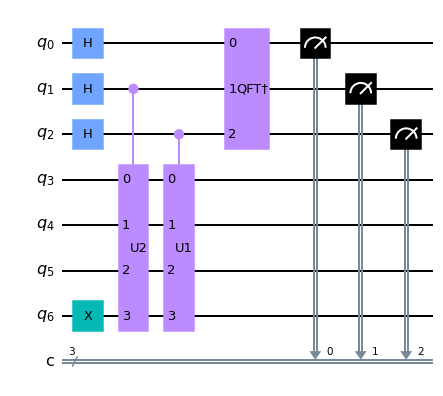

In [55]:
n_count = 3
qc = QuantumCircuit(n_count + 4, n_count)
qc.h([0,1,2])
qc.x(6)
qc.append(U2(), [1, 3, 4, 5, 6])
qc.append(U1(), [2, 3, 4, 5, 6])
qc.append(qft_dagger(3), range(3))
qc.measure(range(3), range(3))
qc.draw(output='mpl')

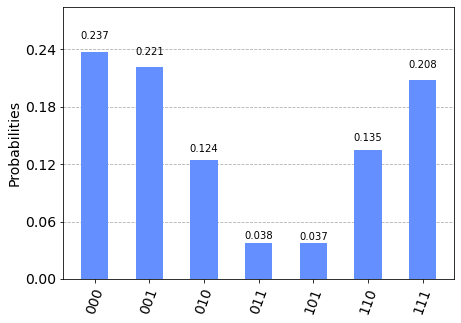

In [56]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

0
1
2
3
5
6
7


In [57]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count) # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append(["%s(bin) = %i(dec)" % (output, decimal), 
                 "%i/%i = %.2f" % (decimal, 2**n_count, phase)])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

     Register Output       Phase
0  000(bin) = 0(dec)  0/8 = 0.00
1  001(bin) = 1(dec)  1/8 = 0.12
2  010(bin) = 2(dec)  2/8 = 0.25
3  011(bin) = 3(dec)  3/8 = 0.38
4  101(bin) = 5(dec)  5/8 = 0.62
5  110(bin) = 6(dec)  6/8 = 0.75
6  111(bin) = 7(dec)  7/8 = 0.88


In [58]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, "%i/%i" % (frac.numerator, frac.denominator), frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0  0.000      0/1            1
1  0.125      1/8            8
2  0.250      1/4            4
3  0.375      3/8            8
4  0.625      5/8            8
5  0.750      3/4            4
6  0.875      7/8            8


Could not find period, check a < N and have no common factors.


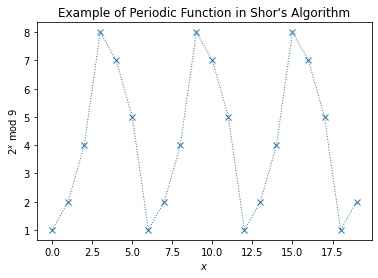

In [78]:
# Trying to modify the circuit for a = 2 and N = 9
N = 9
a = 2

# Calculate the plotting data
xvals = np.arange(20)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel='$%i^x$ mod $%i$' % (a, N),
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) +1 
    plt.annotate(text='', xy=(0,1), xytext=(r,1), arrowprops=dict(arrowstyle='<->'))
    plt.annotate(text='$r=%i$' % r, xy=(r/3,1.5))
except:
    print('Could not find period, check a < N and have no common factors.')

In [136]:
def U2_16():
    """Controlled multiplication by 4 mod 9"""
    U = QuantumCircuit(4)   
    U.x(1)
    U = U.to_gate()
    U.name = "U16" 
    c_U = U.control()
    return c_U

In [137]:
def U2_8():
    """Controlled multiplication by 4 mod 9"""
    U = QuantumCircuit(4)   
    U.x([1,2])
    U = U.to_gate()
    U.name = "U8" 
    c_U = U.control()
    return c_U

In [138]:
def U2_4():
    """Controlled multiplication by 4 mod 9"""
    U = QuantumCircuit(4)   
    U.x([3, 0])
    U = U.to_gate()
    U.name = "U4" 
    c_U = U.control()
    return c_U

In [139]:
def U2_2():
    """Controlled multiplication by 4 mod 9"""
    U = QuantumCircuit(4)   
    U.swap(3,1)
    U = U.to_gate()
    U.name = "U2" 
    c_U = U.control()
    return c_U

In [140]:
def U2_1():
    """Controlled multiplication by 4 mod 9"""
    U = QuantumCircuit(4)   
    U.swap(3,2)
    U = U.to_gate()
    U.name = "U1" 
    c_U = U.control()
    return c_U

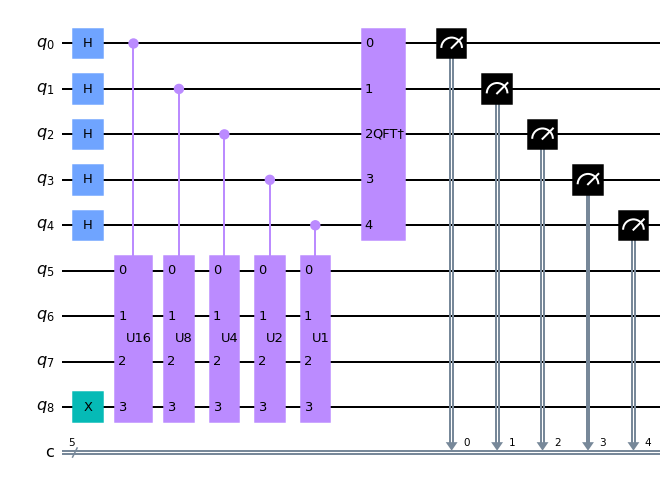

In [141]:
n_count = 5
qc2 = QuantumCircuit(n_count + 4, n_count)
qc2.h(range(n_count))
qc2.x(n_count + 4-1)
qc2.append(U2_16(), [0, 5, 6, 7, 8])
qc2.append(U2_8(), [1, 5, 6, 7, 8])
qc2.append(U2_4(), [2, 5, 6, 7, 8])
qc2.append(U2_2(), [3, 5, 6, 7, 8])
qc2.append(U2_1(), [4, 5, 6, 7, 8])
#qc2.append(U2_1(), [3, 4, 5, 6, 7])
qc2.append(qft_dagger(n_count), range(n_count))
qc2.measure(range(n_count), range(n_count))
qc2.draw(output='mpl')

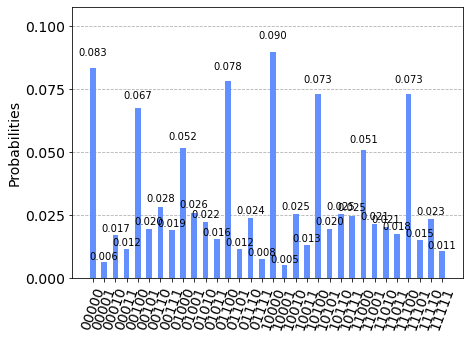

In [142]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc2, backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [143]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count) # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append(["%s(bin) = %i(dec)" % (output, decimal), 
                 "%i/%i = %.2f" % (decimal, 2**n_count, phase)])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

         Register Output         Phase
0    00000(bin) = 0(dec)   0/32 = 0.00
1    00001(bin) = 1(dec)   1/32 = 0.03
2   10000(bin) = 16(dec)  16/32 = 0.50
3   10001(bin) = 17(dec)  17/32 = 0.53
4   10010(bin) = 18(dec)  18/32 = 0.56
5   10011(bin) = 19(dec)  19/32 = 0.59
6   10100(bin) = 20(dec)  20/32 = 0.62
7   10101(bin) = 21(dec)  21/32 = 0.66
8   10110(bin) = 22(dec)  22/32 = 0.69
9   10111(bin) = 23(dec)  23/32 = 0.72
10  11000(bin) = 24(dec)  24/32 = 0.75
11  11001(bin) = 25(dec)  25/32 = 0.78
12  11010(bin) = 26(dec)  26/32 = 0.81
13  11011(bin) = 27(dec)  27/32 = 0.84
14  11100(bin) = 28(dec)  28/32 = 0.88
15  11101(bin) = 29(dec)  29/32 = 0.91
16  11110(bin) = 30(dec)  30/32 = 0.94
17  11111(bin) = 31(dec)  31/32 = 0.97
18   00010(bin) = 2(dec)   2/32 = 0.06
19   00011(bin) = 3(dec)   3/32 = 0.09
20   00100(bin) = 4(dec)   4/32 = 0.12
21   00101(bin) = 5(dec)   5/32 = 0.16
22   00110(bin) = 6(dec)   6/32 = 0.19
23   00111(bin) = 7(dec)   7/32 = 0.22
24   01000(bin) = 8(dec) 

In [144]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, "%i/%i" % (frac.numerator, frac.denominator), frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

      Phase Fraction  Guess for r
0   0.00000      0/1            1
1   0.03125      0/1            1
2   0.50000      1/2            2
3   0.53125     8/15           15
4   0.56250      5/9            9
5   0.59375      3/5            5
6   0.62500      5/8            8
7   0.65625      2/3            3
8   0.68750     9/13           13
9   0.71875      5/7            7
10  0.75000      3/4            4
11  0.78125      7/9            9
12  0.81250     9/11           11
13  0.84375    11/13           13
14  0.87500      7/8            8
15  0.90625    10/11           11
16  0.93750    14/15           15
17  0.96875      1/1            1
18  0.06250     1/15           15
19  0.09375     1/11           11
20  0.12500      1/8            8
21  0.15625     2/13           13
22  0.18750     2/11           11
23  0.21875      2/9            9
24  0.25000      1/4            4
25  0.28125      2/7            7
26  0.31250     4/13           13
27  0.34375      1/3            3
28  0.37500   

In [135]:
np.mod(2**4, 9)

7